# 考虑多年份的收益率情况

删除

1. 被动指数型
2. 纯债型
3. 货币型基金
4. QDII（QDII一般收到外汇额度限制）

end_flag:如果目前仍未停止限购则为1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
df=pd.read_excel('./xls/0518_fund.xlsx',encoding='gbk')
df['scale']=df[['scale2018','scale2019','scale2020']].min(axis=1)  # 得到三年间的最小规模
print('筛选规模后基金数量: ',len(df),end='-->')
df=df[df['scale']>1] # 剔除规模小于1亿的
# df=df[df['types']!='被动指数型基金'] # 已删除被动指数型基金
df_len=len(df)
print(len(df))

df.tail()

筛选规模后基金数量:  2326-->942


,code,name,pause_start,pause_end,limit_amount,limit_days,types,end_flag,est_years,scale2018,...,rank6,rank8,rank10,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,scale
2301,690202.OF,民生增强收益债券C,2019-11-27,2019-12-13,100.0,16,混合债券型基金（二级）,0,10.835616,1.169753,...,2.647413,5.555556,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.169753
2302,700001.OF,平安行业先锋混合,2014-01-28,2014-02-10,50.0,13,偏股混合型基金,0,8.668493,2.629376,...,88.904899,67.206478,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.012596
2304,710001.OF,富安达优势成长混合,2015-05-29,2015-07-01,10.0,33,偏股混合型基金,0,8.665753,16.995839,...,33.429395,41.093117,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,11.925097
2311,762001.OF,国金国鑫发起,2019-11-25,2019-12-24,50.0,29,偏股混合型基金,0,7.728767,2.795248,...,7.060519,-1.000000,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.595080
2318,960002.OF,华夏回报混合H,2018-05-23,2020-05-12,6000.0,720,平衡混合型基金,1,4.391781,124.857450,...,-1.000000,-1.000000,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,105.332783


In [3]:
df.describe()

,limit_amount,limit_days,end_flag,est_years,scale2018,scale2019,scale2020,rank1,rank2,rank3,...,rank6,rank8,rank10,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,scale
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,...,942.000000,942.000000,942.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,942.000000
mean,418.898536,299.866242,0.311040,7.723116,12.866386,13.245021,15.665309,40.580146,37.905287,33.215941,...,17.325997,15.111632,11.501277,NaN,46.264544,39.318752,32.636015,24.734971,11.45513,9.279791
std,1942.053771,485.068700,0.463165,4.276261,17.074055,18.399536,24.123114,27.026594,24.359747,25.254768,...,25.659109,25.685669,24.110528,NaN,NaN,NaN,NaN,NaN,NaN,13.187804
min,0.001000,-6.000000,0.000000,2.142466,1.003887,1.016945,1.006017,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,NaN,46.264544,39.318752,32.636015,24.734971,11.45513,1.003887
25%,10.000000,9.000000,0.000000,4.154795,2.830261,2.504994,2.902829,16.413495,16.857760,11.255067,...,-1.000000,-1.000000,-1.000000,NaN,46.264544,39.318752,32.636015,24.734971,11.45513,1.879190
50%,100.000000,89.000000,0.000000,6.128767,6.553292,6.306804,6.827073,37.088398,35.044865,29.073557,...,0.661853,-1.000000,-1.000000,NaN,46.264544,39.318752,32.636015,24.734971,11.45513,4.601405
75%,500.000000,311.250000,1.000000,11.130822,15.073538,16.050309,17.012903,61.807288,56.029952,52.322787,...,30.625752,25.253036,10.027814,NaN,46.264544,39.318752,32.636015,24.734971,11.45513,10.574925
max,50000.000000,4190.000000,1.000000,18.671233,138.707740,170.751777,204.030314,99.918864,99.950617,99.888517,...,99.518652,99.190283,99.439776,NaN,46.264544,39.318752,32.636015,24.734971,11.45513,137.726520


In [4]:
def filter(dff,amount=(None,None),limit_days=(None,None),est_years=(None,None),scale=(None,None),end_flag=None,rank_year=1):
    dff=dff[dff['rank'+str(rank_year)]!=-1]
    if amount[1]:
        dff=dff[dff['limit_amount']<amount[1]] # 大额申购额度限制额最大值
    if amount[0]:
        dff=dff[dff['limit_amount']>amount[0]] # 大额申购额度限制额最小值
           
    if limit_days[1]:
        dff=dff[dff['limit_days']<limit_days[1]] # 大额申购限制天数最大值
    if limit_days[0]:
        dff=dff[dff['limit_days']>limit_days[0]] # 大额申购限制天数最小值           
    
    if est_years[1]:
        dff=dff[dff['est_years']<est_years[1]] # 基金成立时长最大值
    if est_years[0]:
        dff=dff[dff['est_years']>est_years[0]] # 基金成立时长最小值
           
    if scale[1]:
        dff=dff[dff['scale']<scale[1]] # 基金规模限制最大值
    if scale[0]:
        dff=dff[dff['scale']>scale[0]] # 基金规模限制最小值
        
    if end_flag!=None:
        dff=dff[dff['end_flag']==end_flag] # 基金是否已经取消限购，为1则未取消，为0则已取消
#     elif end_flag==0:
#         dff=dff[dff['end_flag']==0]

    def to_percent(temp, position):
        return '%.0f'%(1 * temp) + '%'
    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.title('Num of Funds with Different Rank',fontdict={'size':16})
    
    plt.ylabel('Frequency',fontdict={'size':14})
    plt.xlabel('Rank (%)',fontdict={'size':14})
    
    print('该筛选条件下基金数量：',len(dff),'       基金百分比排名均值：',dff['rank'+str(rank_year)].mean())
    dff['rank'+str(rank_year)].plot.hist()


    return dff

## 2. 直方图情况
### 2.1 初始数据的直方图情况


该筛选条件下基金数量： 940        基金百分比排名均值： 40.66861399905808


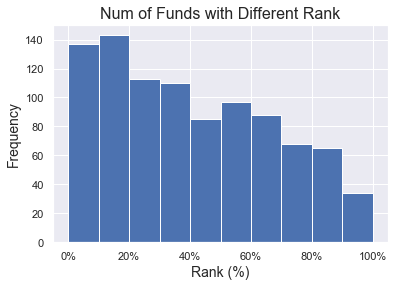

In [35]:
%matplotlib inline
sns.set()
# def to_percent(temp, position):
#     return '%.0f'%(1 * temp) + '%'
# plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
# print('该筛选条件下基金数量：',len(df),'       基金百分比排名均值：',df['rank1'].mean())
dff= filter(df,rank_year=1)
# df['rank1'].plot.hist()
# plt.show()

In [36]:
len(dff['est_years'])


940

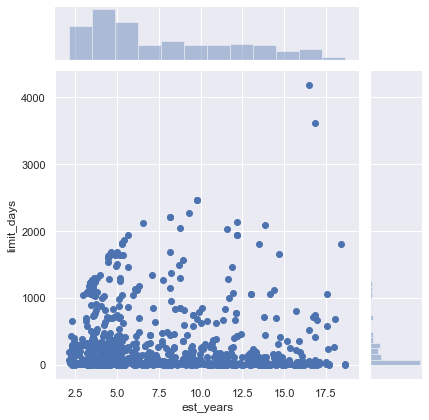

In [44]:
# sns.jointplot(dff[dff['limit_days']<500]['est_years'],dff[dff['limit_days']<500]['limit_days'])
sns.jointplot(dff['est_years'],dff['limit_days'])
# plt.subplot(2,2,3)
# plt.plot([1,100],[1,100])

### 2.2 筛选单日申购上限

该筛选条件下基金数量： 856        基金百分比排名均值： 39.458782340222385


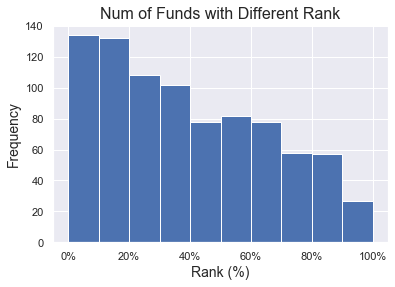

In [6]:
dff=filter(df,amount=(1,10000)) # 单日申购上限（万元）


### 2.3 筛选基金成立时长

该筛选条件下基金数量： 584        基金百分比排名均值： 34.76560177879539


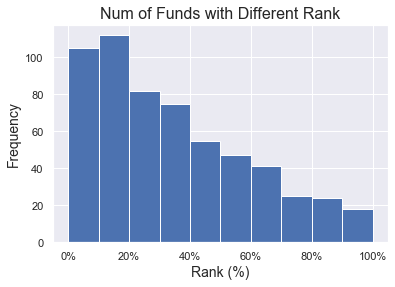

In [7]:
dff=filter(df,est_years=(5,None)) # 基金成立时长（年）


### 2.4 筛选暂停大额申购天数

该筛选条件下基金数量： 169        基金百分比排名均值： 37.72951259946169


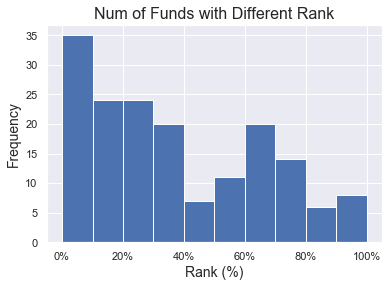

In [8]:
dff=filter(df,limit_days=(60,200)) # 暂停大额申购天数（天）


### 2.5 筛选基金管理规模

该筛选条件下基金数量： 940        基金百分比排名均值： 40.66861399905808


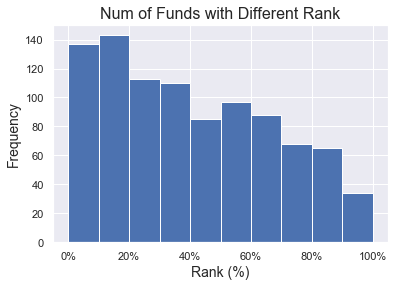

In [9]:
dff=filter(df,scale=(1,None)) # 基金管理规模（亿元）


### 2.6 其他各种复合筛选
1. amount: 单日申购上限（万元）
2. limit_days: 暂停大额申购天数（天）
3. est_years: 基金成立时长（年）
4. scale: 基金管理规模（亿元）

该筛选条件下基金数量： 196        基金百分比排名均值： 36.27672041678695


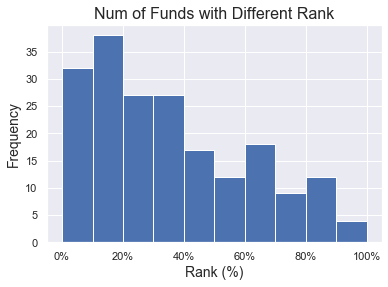

In [10]:
dff=filter(df,amount=(1,10000),limit_days=(60,None),est_years=(5,None),scale=(2,None)) #  单日申购上限（万元），暂停大额申购天数（天），基金成立时长（年），基金管理规模（亿元）


## 考虑是否停止限购

1. 已经停止限购

2. 未停止限购且限购天数已经超过XX天


该筛选条件下基金数量： 649        基金百分比排名均值： 36.53646538246461


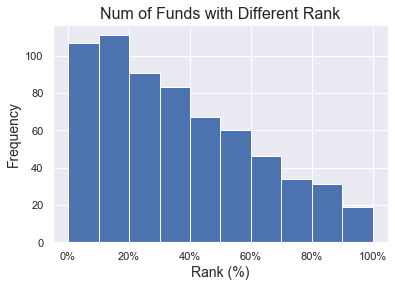

In [11]:
# 已经取消限购的
dff=filter(df,end_flag=0) #  是否已经停止限购，为1则未取消，为0则已取消


该筛选条件下基金数量： 291        基金百分比排名均值： 49.88429940170109


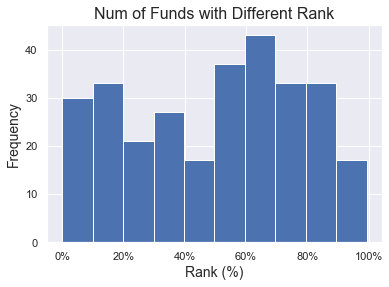

In [12]:
# 未取消限购的
dff=filter(df,end_flag=1,limit_days=(None,None)) #  是否已经停止限购，为1则未取消，为0则已取消


未停止限购，且时间很长的基金收益率均值表现较差

该筛选条件下基金数量： 78        基金百分比排名均值： 52.7115113764097


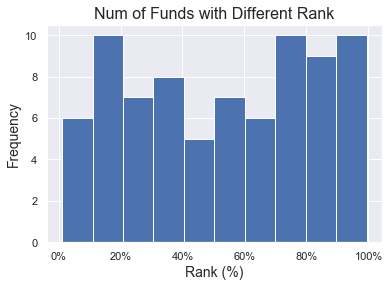

In [13]:
# 未取消限购且限购市场已经1000天以上的

dff=filter(df,end_flag=1,limit_days=(1000,None)) #  是否已经停止限购，为1则未取消，为0则已取消

## 3. 分组绘制平均收益率的图形

* 将初筛后的基金数据按照四个指标，从小到大分为十组

* 计算每组的平均百分比排名情况

In [14]:
# from matplotlib.ticker import FuncFormatter
def group_by_indicator(indicator,N=10,df_now=df,rank_year=1):
    '''
    indicator: 按哪个指标进行分组
    N: 分组组数
    rank_year: 使用多少年的收益率排名情况作为排名结果展示，默认使用过去1年的收益率    
    '''
    df_now=df_now[df_now['rank'+str(rank_year)]!=-1]
    dfs=df_now.sort_values(by=indicator)
    
    df_len=len(dfs) # 重新定义了一下df_len，传入该函数的df长度,为函数内部参数
    print('分为 {} 个组，每组包含基金 {} 支'.format(N,int(df_len/N)))
    avg_list=[]
    sdf_list=[]
    for i in range(N):# 分成十组
        small_df=dfs.iloc[int(i*df_len/N):int((i+1)*df_len/N)]
        sdf_list.append(small_df['rank'+str(rank_year)])
        start_=small_df[indicator].min()
        end_=small_df[indicator].max()
        avg_list.append([start_,end_,small_df['rank'+str(rank_year)].mean()])
    df_group=pd.DataFrame(avg_list,columns=['起始','结束','Avg Rank'])
    
    def to_percent(temp, position):
        return '%.0f'%(1 * temp) + '%'
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    
    # print(sdf_list)
    plt.boxplot(sdf_list)
    plt.plot([x+1 for x in range(N)],[50]*N,'b--',linewidth=2)

    plt.xlabel('Groups',fontdict={'size':14})
    plt.ylabel('Avg Rank',fontdict={'size':14})
    plt.title('Avg Rank of Different Group (Smaller is better)',fontdict={'size':16})
    
    # 均值线
    plt.plot([x+1 for x in range(N)],df_group['Avg Rank'],'r',linewidth=3,marker='D')
    
    plt.legend()

    # 其他的画图尝试，不用的
    
    # df_group['业绩百分比排名均值'].plot(color='r')
    # plt.bar([x for x in range(N)],df_group['业绩百分比排名均值']-50,color='lightblue') #用条形图的方式


    # print(df_group)
    return df_group

### 3.1 按照限购规模分组

> 如果没有标注，默认使用过去1年（2019-05-12到2020-05-12）的收益率

No handles with labels found to put in legend.


分为 10 个组，每组包含基金 94 支


,起始,结束,Avg Rank
0,0.001,5.0,52.455350
1,5.000,10.0,43.318973
2,10.000,20.0,45.780055
3,25.000,100.0,33.896556
4,100.000,100.0,31.976637
5,100.000,100.0,41.268983
6,100.000,499.0,41.379528
7,500.000,500.0,40.903827
8,500.000,1000.0,37.987530
9,1000.000,50000.0,37.718701


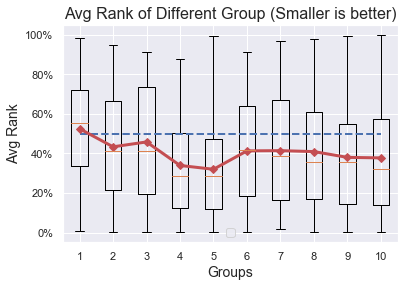

In [15]:
group_by_indicator(indicator='limit_amount',rank_year=1)


### 3.2 按照已经实行限制的天数分组

分为 20 个组，每组包含基金 47 支


No handles with labels found to put in legend.


,起始,结束,Avg Rank
0,-6,3,38.229724
1,3,4,44.094857
2,4,6,37.476731
3,6,6,34.609114
4,7,9,29.980451
5,9,14,32.781471
6,14,27,36.625696
7,27,35,30.170942
8,35,51,31.153894
9,53,87,26.127995


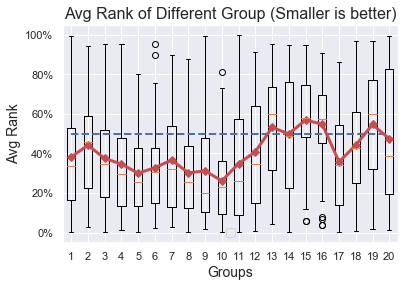

In [16]:
group_by_indicator(indicator='limit_days',N=20) # 改变参数N可选择分组的个数

### 3.3 按照基金的成立时长分组

No handles with labels found to put in legend.


分为 10 个组，每组包含基金 94 支


,起始,结束,Avg Rank
0,2.142466,3.358904,44.691432
1,3.369863,3.813699,54.113868
2,3.813699,4.465753,50.395275
3,4.465753,5.093151,52.031649
4,5.093151,6.128767,40.459964
5,6.136986,8.142466,33.574509
6,8.145205,9.975342,25.240783
7,10.027397,12.002740,36.336095
8,12.060274,14.183562,34.796939
9,14.320548,18.671233,35.045625


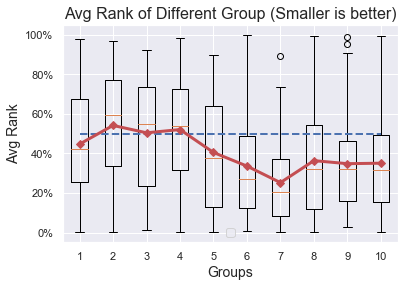

In [17]:
group_by_indicator(indicator='est_years')

### 3.4 按照基金的资产管理规模分组

No handles with labels found to put in legend.


分为 10 个组，每组包含基金 94 支


,起始,结束,Avg Rank
0,1.003887,1.305662,47.523487
1,1.309318,1.650082,42.555388
2,1.653944,2.137679,44.416140
3,2.147473,3.152273,42.625858
4,3.154756,4.603887,36.499545
5,4.610320,6.269261,44.462104
6,6.274173,8.776279,41.409445
7,8.791122,13.529417,34.879995
8,13.642732,22.550801,35.959736
9,22.687382,137.726520,36.354442


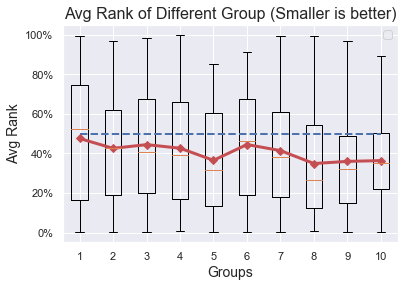

In [18]:
group_by_indicator(indicator='scale')

## 不同年份数据比较


1. 选择出2010-05-12到2020-05-12十年间收益率存在的基金

2. 按照过去**一年期**(2019-05-12到2020-05-12)收益率对其进行分组

3. 分别计算分组在过去1、2、3、4、6、8、10年期收益率的情况

No handles with labels found to put in legend.
No handles with labels found to put in legend.


该筛选条件下基金数量： 282        基金百分比排名均值： 40.75958507266653
分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支


No handles with labels found to put in legend.
No handles with labels found to put in legend.


分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支


No handles with labels found to put in legend.


分为 10 个组，每组包含基金 28 支


No handles with labels found to put in legend.


分为 10 个组，每组包含基金 28 支


No handles with labels found to put in legend.


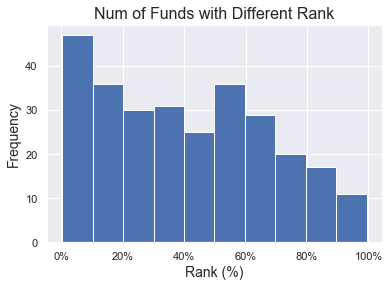

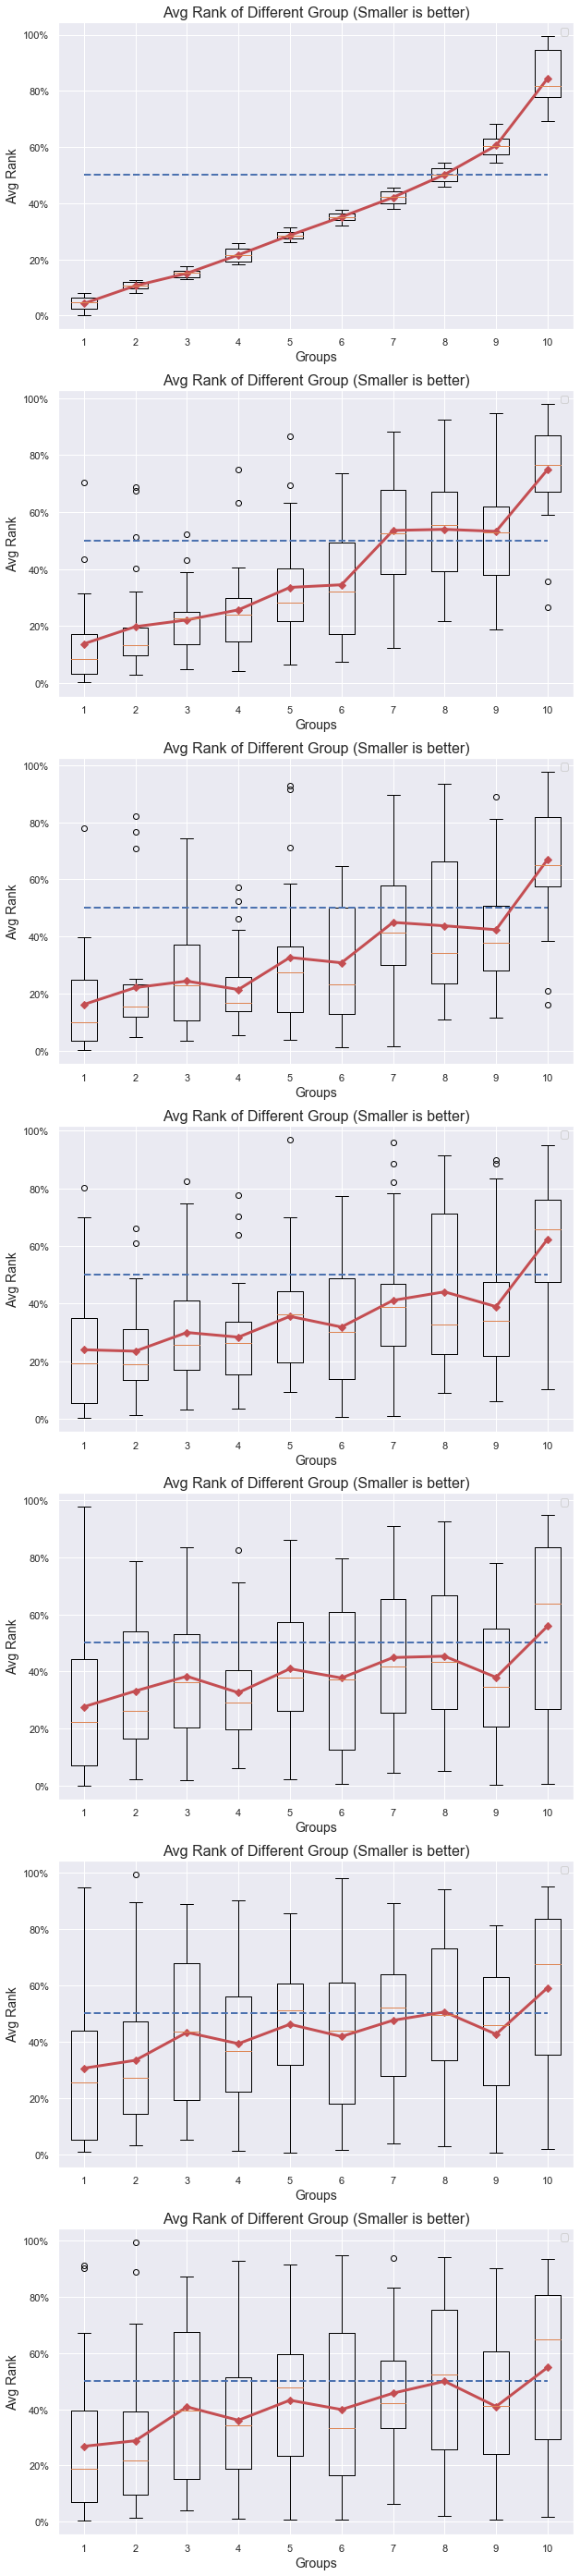

In [19]:
dff=filter(df,rank_year=10) #  选取有过去十年收益率的基金数据
plt.figure(figsize=(10,50))
years=[1,2,3,4,6,8,10] # 收益率年份
for index,year in enumerate(years):  
    plt.subplot(len(years),1,index+1)
    # indicator表示目前按照哪个指标来分组，rank_year 表示收益率使用哪年的来算
    group_by_indicator(indicator='rank1',df_now=dff,rank_year=year)


可以看到，过去一年期表现较好的基金，在更长的时间长度上表现仍较好（过去一年的收益率会影响累计收益率？）

但是优势随着时间跨度的加长逐渐不明显

### 与刚刚相反

1. 选择出2010-05-12到2020-05-12十年间收益率存在的基金

2. 按照过去**十年期**(2010-05-12到2020-05-12)收益率对其进行分组

3. 分别计算分组在过去1、2、3、4、6、8、10年期收益率的情况

No handles with labels found to put in legend.
No handles with labels found to put in legend.


该筛选条件下基金数量： 282        基金百分比排名均值： 40.75958507266653
分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支


No handles with labels found to put in legend.
No handles with labels found to put in legend.


分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


分为 10 个组，每组包含基金 28 支
分为 10 个组，每组包含基金 28 支


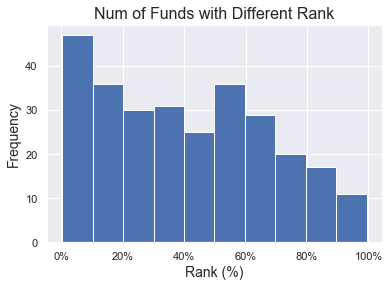

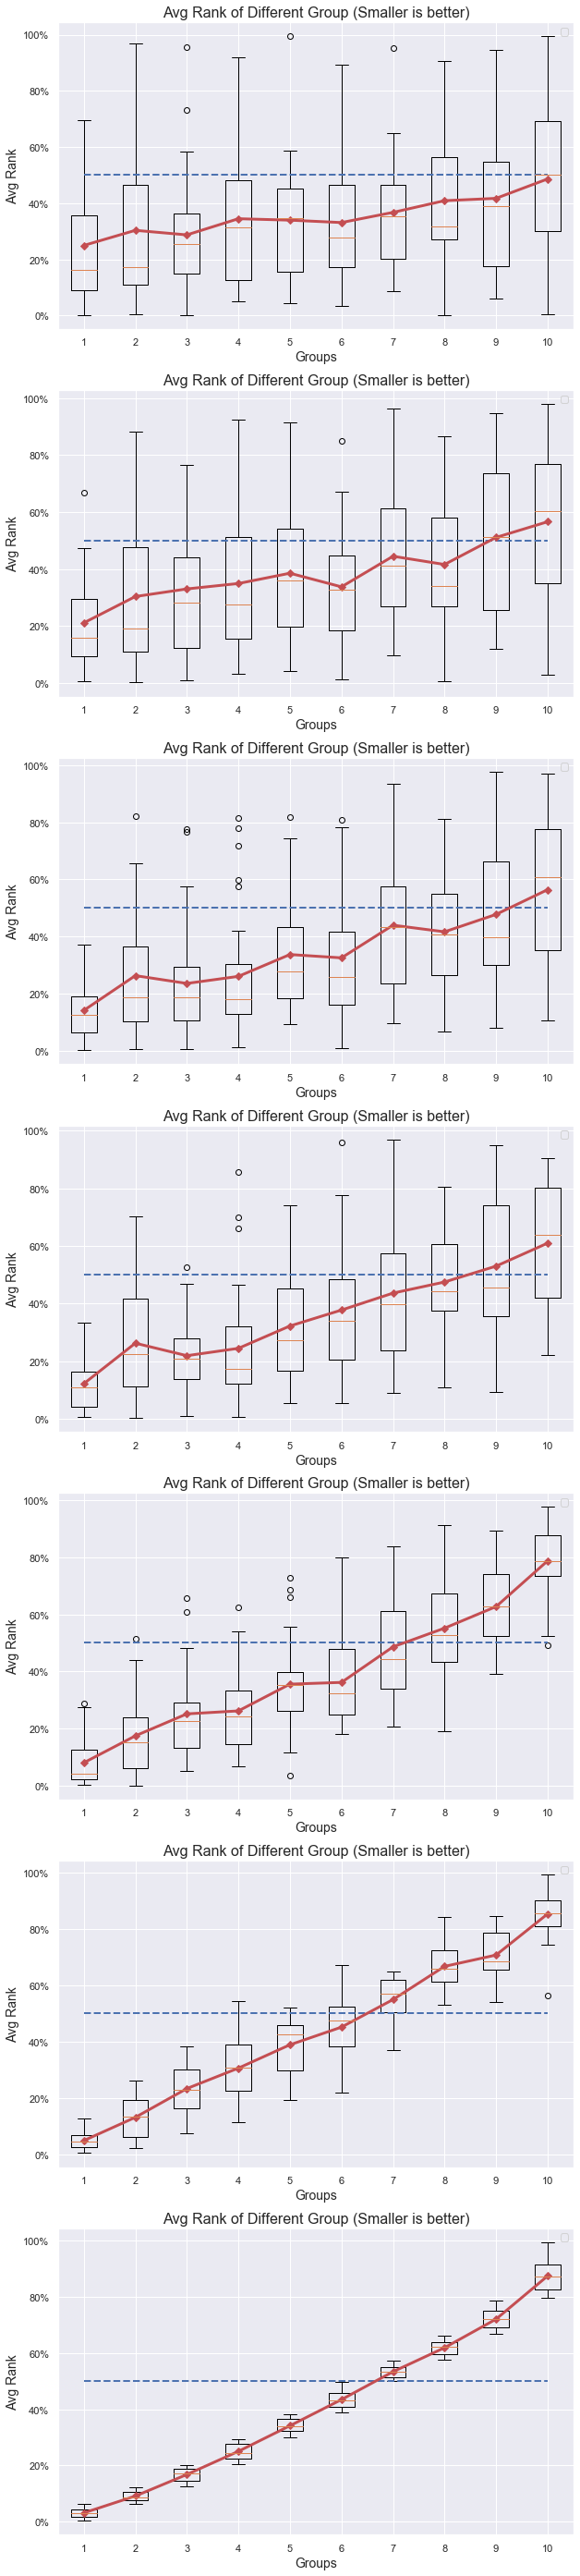

In [20]:
dff=filter(df,rank_year=10) #  选取有过去十年收益率的基金数据
plt.figure(figsize=(10,50))
years=[1,2,3,4,6,8,10] # 收益率年份
for index,year in enumerate(years):  
    plt.subplot(len(years),1,index+1)
    # indicator表示目前按照哪个指标来分组，rank_year 表示收益率使用哪年的来算
    group_by_indicator(indicator='rank10',df_now=dff,rank_year=year)

该筛选条件下基金数量： 282        基金百分比排名均值： 40.75958507266653


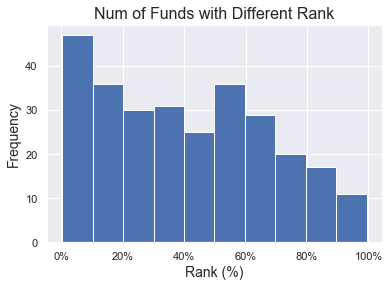

In [21]:
dff=filter(df,rank_year=10) #  选取有过去十年收益率的基金数据


1年与10年的收益率排名散点图


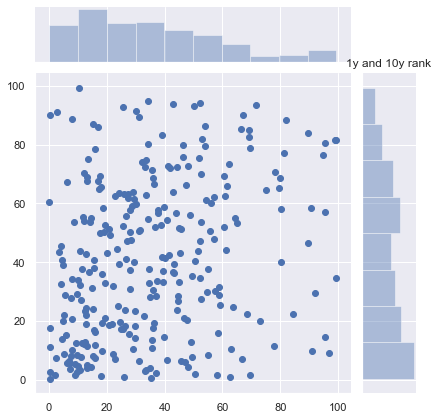

8年与10年的收益率排名散点图


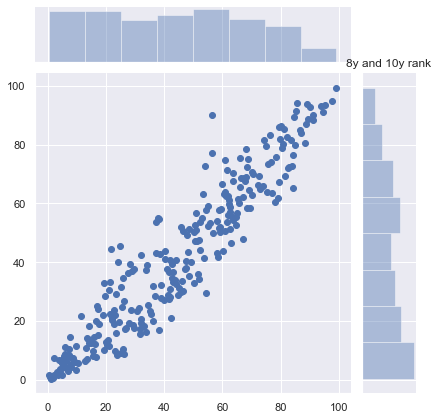

In [22]:

print('1年与10年的收益率排名散点图')
sns.jointplot(dff[['rank1']],dff[['rank10']])
plt.title('1y and 10y rank')
plt.show()

print('8年与10年的收益率排名散点图')
sns.jointplot(dff[['rank8']],dff[['rank10']])
plt.title('8y and 10y rank')
plt.show()

不同年份的排名之间的相关系数矩阵
其中0-6分别表示1、2、3、4、6、8、10年的基金收益率百分比排名


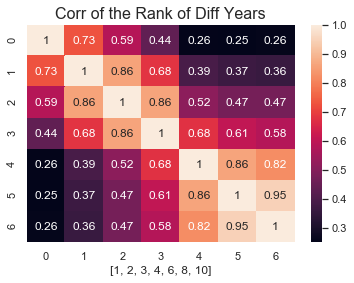

In [23]:
rank_years=['rank'+str(i) for i in years]
df_rank=dff[rank_years]
print('不同年份的排名之间的相关系数矩阵\n其中0-6分别表示1、2、3、4、6、8、10年的基金收益率百分比排名')
df_rank.columns=years
corr=np.corrcoef(df_rank.T)
sns.heatmap(corr,annot=True)
# annot=True表示在方格内显示数值。
plt.title('Corr of the Rank of Diff Years',size=16)
plt.xlabel(years)
plt.show()